# Imports

In [44]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from xgboost import XGBRegressor, train
    from sklearn.ensemble import RandomForestRegressor
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import LabelEncoder

# Model and encoder instances

In [45]:
encoder = LabelEncoder()
xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()

# Training and testing data importing

In [46]:
train_data = pd.read_csv('C:/Users/kunjs/OneDrive/Desktop/Desktop/Projects/MLDemo/housePrice/train.csv')
test_data = pd.read_csv('C:/Users/kunjs/OneDrive/Desktop/Desktop/Projects/MLDemo/housePrice/test.csv')

train_data.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [47]:
len(train_data)

1460

# *Data Cleaning*

    This code, when called fills every NaN object with mean of the column as it may create issues is with further method calls.
    After that, second for loops converts all Objects (especially Strings) into an integer using *Label-Encoder* which makes it easier to train the model.
    And finally it standardises the years and drops ID which is of no use

In [48]:
def data_cleaning(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = encoder.fit_transform(data[col])
    for col in data.isna():
        data[col] = data[col].fillna(data[col].mean())
    for col in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']:
        data[col] = data[col] - 2000
    data.drop(['Id'], axis=1, inplace=True)
    
    return data

# Seaborn Heatmap (raw)
    Must be called once you have called data cleaning, or else wouldnt work.

In [49]:
def createHeatMap(data): 
    corr_mat = data.corr()
    sns.heatmap(corr_mat, annot=True, center=0)
    plt.show()

In [50]:
train_data = data_cleaning(train_data)
test_data = data_cleaning(test_data)

# Experiment
    RandomForest model experiment to find to the important features

In [51]:
search_space_demo = {
    'n_estimators': [100,200,300],
    # 'learning rate': [0.01,0.1],
    'max_depth': [10,12,13],
    # 'subsample': [0.8,0.7]
}

X_demo = train_data.iloc[:,:-1]
y_demo = train_data.iloc[:,-1]
X_demo_train, X_demo_test, y_demo_train, y_demo_test = train_test_split(X_demo, y_demo, )

rf_model_demo = RandomForestRegressor()

GS_demo = GridSearchCV(rf_model_demo, search_space_demo, cv=5, n_jobs=-1,verbose=2)

GS_demo.fit(X_demo_train, y_demo_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 13],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

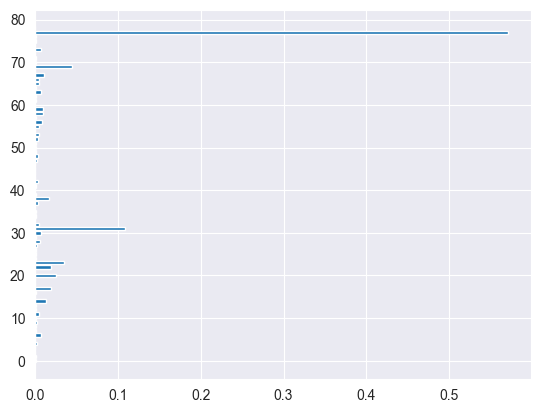

In [52]:
importances_demo = GS_demo.best_estimator_.feature_importances_
indices_demo = np.argsort(importances_demo)

plt.barh(indices_demo, importances_demo, align='center')
plt.show()

In [53]:
for i, col in enumerate(X_demo_train.columns):
    if i in [38,39,40,41,42,43,44,45,46,47,48,60,61,62,63,64,65,66,67,76,77,78,79,80]:
        X_demo_train.drop(col, axis=1, inplace=True)

In [54]:
GS_demo.best_score_

np.float64(0.8565570839514527)